#  TECHNO HACKS EDUTECH- Virtual Internship 2023

# Name : Yash Rajesh Baitule

# Task 3 : Employee turnover prediction

# Data Description


## What is Employee Turnover?
### Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

### A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
hr = pd.read_csv('/Users/ybait/Downloads/HR_comma_sep.csv')

In [3]:
col_names = hr.columns.tolist()

In [4]:
print("Column names:")
print(col_names)
print("\nSample data:")

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


In [5]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Rename column name from “sales” to “department”:

In [6]:
hr=hr.rename(columns = {'sales':'department'})

#### The type of the columns can be found out as follows:

#### Our data is pretty clean, with no missing values, so let’s move further and see how many employees work in the organization:
------------------------------


In [7]:
hr.shape

(14999, 10)

#### The “left” column is the outcome variable recording one and 0. 1 for employees who left the company and 0 for those who didn’t.

#### The department column of the dataset has many categories, and we need to reduce the categories for better modelling. Let’s see all the categories of the department column:
-----------------------------------

In [8]:
hr["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

#### Let’s add all the “technical”, “support” and “IT” columns into one column to make our analysis easier.
---------------------------------------------


In [9]:
hr["department"]=np.where(hr["department"]=="support","technical",hr["department"])
hr["department"]=np.where(hr["department"]=="IT","technical",hr["department"])

# Creating Variables for Categorical Variables

#### As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.
-----------------------------------------


In [10]:
cat_vars=["department","salary"]
for var in cat_vars:
    cat_list="var"+"_"+var
    cat_list=pd.get_dummies(hr[var],prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

#### Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables:
-------------------------------------------------


In [11]:
hr.drop(hr.columns[[8,9]],axis=1,inplace=True)

In [12]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

#### The outcome variable is “left”, and all the other variables are predictors. 
-------------------------------


In [13]:
hr_vars=hr.columns.values.tolist()

In [14]:
y=["left"]
X=[i for i in hr_vars if i not in y]

# Logistic Regression Model to Predict Employee Turnover

In [15]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Random Forest Classification Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


# Confusion Matrix for our Machine Learning Models

#### Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.
--------------------------------------------------------


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [22]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



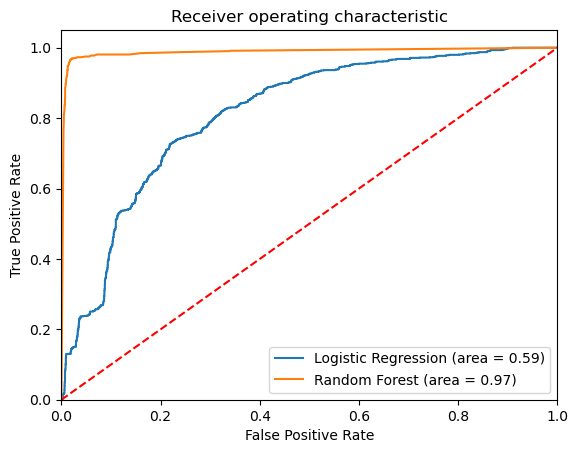

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

#### So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.
---------------------------------------------------


In [24]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.25%
promotion_last_5years-0.25%
department_hr-0.30%
department_RandD-0.31%
salary_high-0.67%
salary_low-1.22%
Work_accident-1.56%
last_evaluation-18.40%
time_spend_company-27.29%
satisfaction_level-49.76%


# conclusion
### According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.
------------------------------------------------------


# Thank You